In [1]:
from detecto import core, utils
from detecto.visualize import show_labeled_image
from torchvision import transforms
import numpy as np

In [2]:
path_images = 'images'
path_train_labels = 'train_labels'
path_test_labels = 'test_labels'

In [3]:
custom_transformers = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((50)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    utils.normalize_transform()
])

In [4]:
trained_labels = ['apple', 'banana']

In [5]:
train_dataset = core.Dataset(image_folder=path_images, label_data=path_train_labels, transform=custom_transformers)
test_dataset = core.Dataset(image_folder=path_images, label_data=path_test_labels, transform=custom_transformers)

In [6]:
train_loader = core.DataLoader(train_dataset, batch_size=2, shuffle=False)
test_loader = core.DataLoader(test_dataset, batch_size=2, shuffle=False)

In [7]:
model = core.Model(trained_labels)

c:\code\data_science\machine-learning-projects\pytorch\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\code\data_science\machine-learning-projects\pytorch\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
losses = model.fit(train_loader, test_dataset, epochs=2, verbose=True)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 2
Begin iterating over training dataset


100%|██████████| 66/66 [22:17<00:00, 20.27s/it]


Begin iterating over validation dataset


100%|██████████| 34/34 [01:34<00:00,  2.78s/it]


Loss: 0.3312337004086551
Epoch 2 of 2
Begin iterating over training dataset


100%|██████████| 66/66 [20:53<00:00, 19.00s/it]


Begin iterating over validation dataset


100%|██████████| 34/34 [01:39<00:00,  2.94s/it]

Loss: 0.32727235446081443


['banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana', 'banana', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana', 'apple', 'apple', 'apple', 'banana', 'banana', 'apple', 'banana', 'banana', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'apple', 'banana', 'banana', 'apple', 'apple', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana']


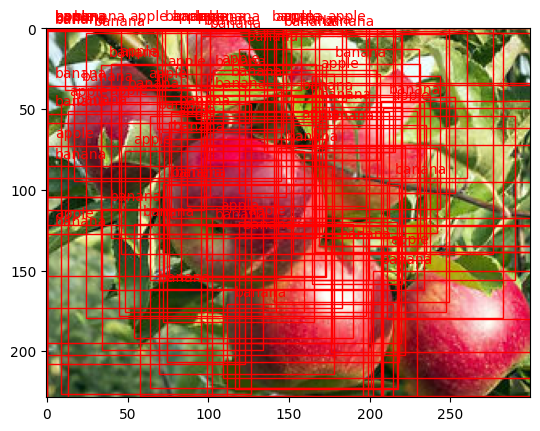

In [14]:
test_image_path = 'images/apple_77.jpg'
test_image = utils.read_image(test_image_path)

pred = model.predict(test_image)
labels, boxes, scores = pred
print(labels)
show_labeled_image(test_image, boxes, labels)

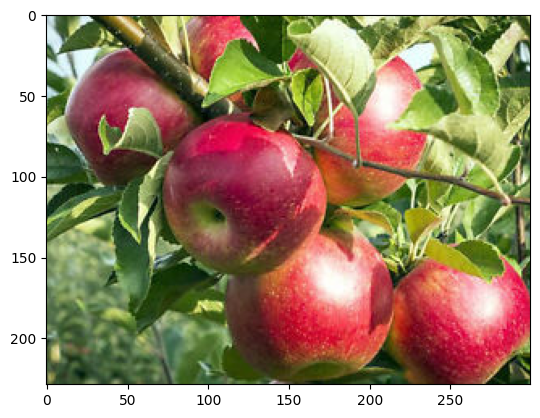

In [10]:
conf_threshold = 0.7
filtered_indices = np.where(scores > conf_threshold)
filteres_scores = scores[filtered_indices]
filtered_boxes = boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(test_image, filtered_boxes, filtered_labels)

In [15]:
y_test_pred = []
import torch
with torch.no_grad():
    for j, data in enumerate(test_loader):
        image, label = data
        output = model.predict(image)
        y_test_pred.extend(output)
        
        break

In [16]:
for j, data in enumerate(train_loader):
    print(j)
    image, label = data
    print(label)

0
[{'boxes': tensor([[ 2,  3, 48, 47]]), 'labels': ['apple']}, {'boxes': tensor([[22,  3, 50, 29],
        [53,  3, 74, 32],
        [36,  0, 61, 25]]), 'labels': ['apple', 'apple', 'apple']}]
1
[{'boxes': tensor([[11,  2, 47, 41]]), 'labels': ['apple']}, {'boxes': tensor([[25, 16, 45, 35],
        [ 6, 26, 24, 43],
        [12, 18, 29, 34]]), 'labels': ['apple', 'apple', 'apple']}]
2
[{'boxes': tensor([[21, 11, 50, 39]]), 'labels': ['apple']}, {'boxes': tensor([[30, 17, 66, 50]]), 'labels': ['apple']}]
3
[{'boxes': tensor([[ 2,  7, 45, 50]]), 'labels': ['apple']}, {'boxes': tensor([[15, 14, 51, 44]]), 'labels': ['apple']}]
4
[{'boxes': tensor([[ 6,  4, 52, 47]]), 'labels': ['apple']}, {'boxes': tensor([[ 7, 10, 41, 44]]), 'labels': ['apple']}]
5
[{'boxes': tensor([[11, 14, 40, 44],
        [36, 13, 69, 45]]), 'labels': ['apple', 'apple']}, {'boxes': tensor([[ 8, 14, 40, 45]]), 'labels': ['apple']}]
6
[{'boxes': tensor([[16, 21, 35, 41],
        [23, 13, 40, 31],
        [ 9, 14, 26, 3